 Dataset Loaded Successfully

 Categorical columns encoded

 Top Features Based on Importance:
cp          0.137156
chol        0.112528
age         0.098754
thalch      0.094564
oldpeak     0.086220
dataset     0.078893
exang       0.075990
slope       0.073049
trestbps    0.069564
ca          0.045783
dtype: float64


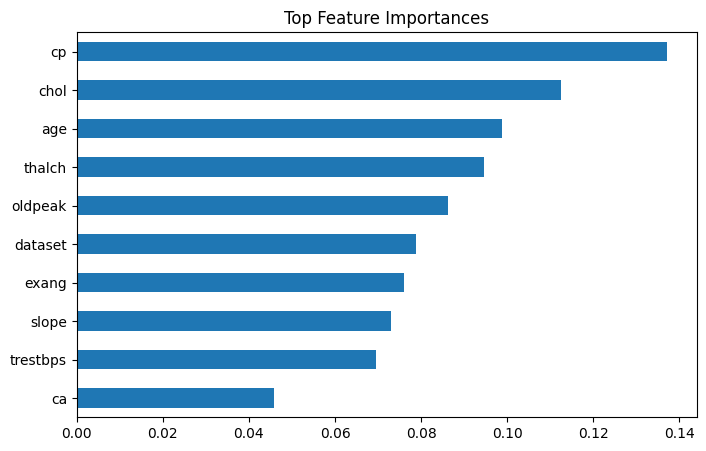


 Accuracy: 0.8369565217391305

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



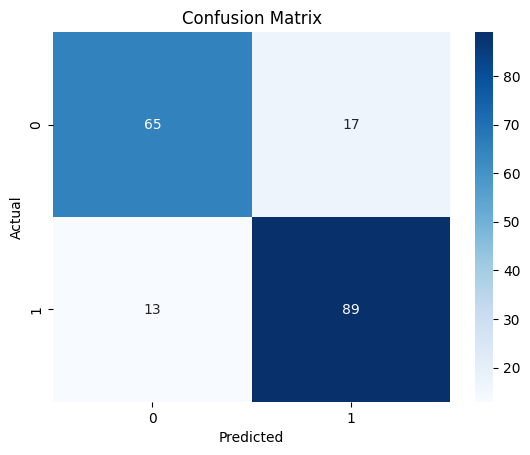


 Model Accuracy Saved: 0.8369565217391305


['model_accuracy.pkl']

In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 2: Load Dataset
df = pd.read_csv('/content/heart_disease_uci.csv')  # Adjust path if needed
print(" Dataset Loaded Successfully")

# STEP 3: Drop Irrelevant Columns
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# STEP 4: Encode Categorical Columns
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

print("\n Categorical columns encoded")

# STEP 5: Convert to Binary Classification (0 = no disease, 1 = has disease)
if 'num' in df.columns:
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df.drop(columns=['num'], inplace=True)
elif 'target' not in df.columns:
    df['target'] = df[df.columns[-1]]

# STEP 6: Separate Features and Target
X = df.drop(columns=['target'])
y = df['target']

# STEP 7: Handle Missing Values using Imputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# STEP 8: Train Full Model for Feature Importances
full_model = RandomForestClassifier(n_estimators=100, random_state=42)
full_model.fit(X_imputed, y)

feat_importances = pd.Series(full_model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

print("\n Top Features Based on Importance:")
print(feat_importances.head(10))

# Plot Top 10 Features
feat_importances.head(10).plot(kind='barh', title="Top Feature Importances", figsize=(8,5))
plt.gca().invert_yaxis()
plt.show()

# STEP 9: Use Top 10 Features
top_features = feat_importances.head(10).index.tolist()
X_top = X_imputed[top_features]

# STEP 10: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

# STEP 11: Train Random Forest with Top Features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 12: Predict and Evaluate
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

import joblib

# Save these in your notebook after training
joblib.dump(model, 'random_forest_heart_model.pkl')
joblib.dump(top_features, 'top_features.pkl')

# STEP 13: Save Accuracy as a Pickle File
model_accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy Saved:", model_accuracy)

joblib.dump(model_accuracy, 'model_accuracy.pkl')
